In [1]:
# See through the cifar-10 dataset and display some image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision

import gc

import os
import sys

from CNN_model import cnn

In [2]:
# Download CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.CIFAR10(root='data', train=True, download=False, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='data', train=False, download=False, transform=transform)

In [3]:
len(train_dataset) , len(test_dataset) # 50000 train and 10000 test data

(50000, 10000)

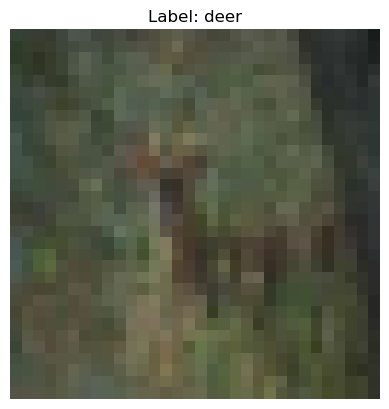

In [4]:
# Access one instance from the train_dataset
image, label = train_dataset[10]  # Replace 0 with any index to view a different instance

# Convert the image tensor to a NumPy array for visualization
image = np.transpose(image.numpy(), (1, 2, 0))  # Rearrange dimensions from (C, H, W) to (H, W, C)

# CIFAR-10 class names
classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Display the image with its label
plt.imshow(image)
plt.title(f"Label: {classes[label]}")  # Map the label to its class name
plt.axis('off')
plt.show()

In [5]:
# Convert train and test datasets to tensors
train_images_tensor = torch.stack([train_dataset[i][0] for i in range(len(train_dataset))])
train_labels_tensor = torch.tensor([train_dataset[i][1] for i in range(len(train_dataset))])

test_images_tensor = torch.stack([test_dataset[i][0] for i in range(len(test_dataset))])
test_labels_tensor = torch.tensor([test_dataset[i][1] for i in range(len(test_dataset))])

print(f"Train images tensor shape: {train_images_tensor.shape}")
print(f"Train labels tensor shape: {train_labels_tensor.shape}")
print(f"Test images tensor shape: {test_images_tensor.shape}")
print(f"Test labels tensor shape: {test_labels_tensor.shape}")

# Convert tensors to NumPy arrays
train_images_numpy = train_images_tensor.numpy()
train_labels_numpy = train_labels_tensor.numpy()

test_images_numpy = test_images_tensor.numpy()
test_labels_numpy = test_labels_tensor.numpy()

train_images_numpy = train_images_numpy[:10]

print(f"Train images NumPy shape: {train_images_numpy.shape}")
print(f"Train labels NumPy shape: {train_labels_numpy.shape}")
print(f"Test images NumPy shape: {test_images_numpy.shape}")
print(f"Test labels NumPy shape: {test_labels_numpy.shape}")


# Clear tensors from memory
del train_images_tensor
del train_labels_tensor
del test_images_tensor
del test_labels_tensor

# Force garbage collection to free up memory
gc.collect()

Train images tensor shape: torch.Size([50000, 3, 32, 32])
Train labels tensor shape: torch.Size([50000])
Test images tensor shape: torch.Size([10000, 3, 32, 32])
Test labels tensor shape: torch.Size([10000])
Train images NumPy shape: (10, 3, 32, 32)
Train labels NumPy shape: (50000,)
Test images NumPy shape: (10000, 3, 32, 32)
Test labels NumPy shape: (10000,)


2428

In [6]:
in_channel = 3
out_channel = 32
kernel_size = 5
stride = 1
padding = 1

model = cnn(in_channel, out_channel, kernel_size, stride, padding)

In [7]:
output = model.forward(train_images_numpy)

In [8]:
output.shape

(10, 32, 30, 30)

In [9]:
output

array([[[[ 3.80450562,  5.68694559,  6.87020418, ..., 13.43313281,
          13.16049773, 11.05593599],
         [ 5.05089773,  7.39283337,  8.83186018, ..., 15.07650601,
          14.56360876, 11.53291877],
         [ 5.39331065,  7.80484754,  9.36944406, ..., 12.72740329,
          11.81109315,  8.91315609],
         ...,
         [14.7866232 , 19.01285738, 17.47993428, ..., 14.96820759,
          14.64220689, 13.38789657],
         [15.68148319, 19.97630095, 18.78292184, ..., 14.931133  ,
          15.1034806 , 13.97858594],
         [12.42936063, 16.04370973, 15.27258719, ..., 10.59992552,
          11.00956318, 10.40551815]],

        [[ 5.42348702,  7.22335426,  8.67943626, ..., 14.505551  ,
          14.09611271, 10.70212578],
         [ 7.11233053,  9.51348597, 11.24309811, ..., 16.6513146 ,
          15.97205405, 12.07875891],
         [ 7.5961401 ,  9.93989668, 11.6530843 , ..., 14.11388187,
          13.04443341,  9.68404388],
         ...,
         [18.16751644, 20.88147565

In [10]:
output.shape

(10, 32, 30, 30)

In [11]:
dl_dz = np.random.rand(10, 32, 30, 30)

In [ ]:
dl_dw = model.backward(dl_dz)

In [14]:
dl_dw

array([[[[ 7.45790373, 13.8284257 , 20.98860288, ..., 24.96191644,
          15.85483156,  7.75187361],
         [15.31146214, 27.88379056, 42.10970582, ..., 48.15989343,
          32.7597111 , 17.00200342],
         [22.91878607, 43.33863577, 64.05182788, ..., 74.43667143,
          46.54221502, 23.18286141],
         ...,
         [21.81645514, 49.36863844, 73.00500286, ..., 68.97322137,
          45.60382427, 23.63077926],
         [16.05664202, 33.58355993, 50.68131344, ..., 43.33671523,
          29.7311559 , 15.4400187 ],
         [ 7.85665582, 16.77477828, 25.86904793, ..., 21.96012397,
          15.16705354,  8.51737047]],

        [[ 7.22208752, 14.25751685, 21.21172729, ..., 24.63326693,
          13.59034569,  6.97408519],
         [15.31792935, 28.7585383 , 45.37028608, ..., 49.35635764,
          30.57000013, 14.48040216],
         [20.62583305, 42.70871124, 68.57791882, ..., 76.38466818,
          48.72679571, 24.20972354],
         ...,
         [23.77396599, 52.19697173